### Import the libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

### Define path to the data directory

In [3]:
data_dir = Path('./data/TB_Chest_Radiography_Database/')

data_dir

PosixPath('data/TB_Chest_Radiography_Database')

### Import the dataset

In [4]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / 'Normal'
Tuberculosis_cases_dir = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img, 0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))
    
# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,data/TB_Chest_Radiography_Database/Tuberculosi...,1
1,data/TB_Chest_Radiography_Database/Normal/Norm...,0
2,data/TB_Chest_Radiography_Database/Normal/Norm...,0
3,data/TB_Chest_Radiography_Database/Normal/Norm...,0
4,data/TB_Chest_Radiography_Database/Normal/Norm...,0


In [5]:
train_data.shape

(4200, 2)

0    3500
1     700
Name: label, dtype: int64


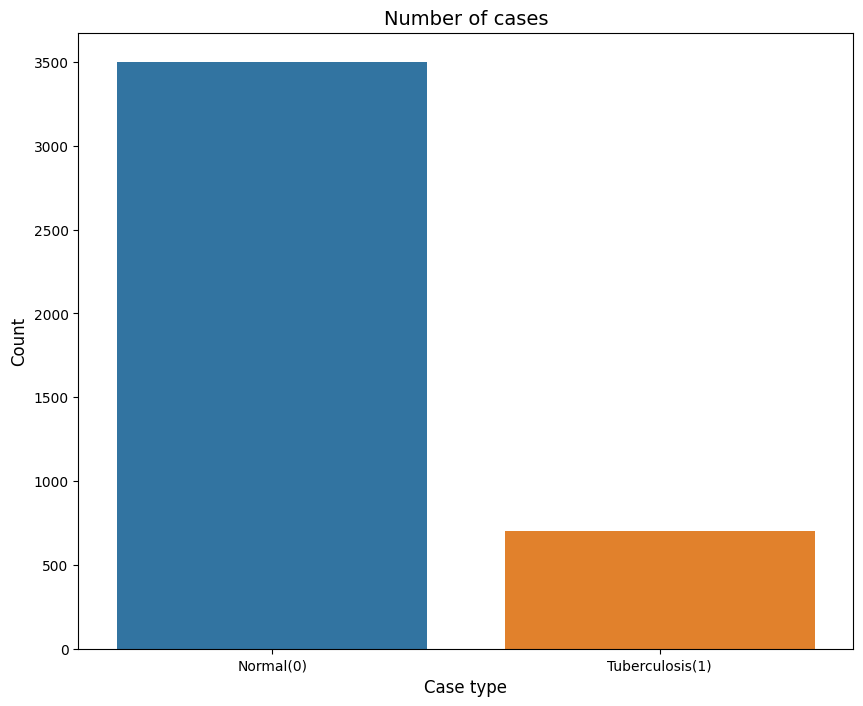

In [6]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()